In [35]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
import pandas as pd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.ticker as mtick
import matplotlib.gridspec as gridspec

sns.set_style('ticks')

In [36]:
run -i data_prep.py

In [37]:
# * Import all the data needed for visualization

capacity_additions = pd.read_pickle('Dat_figures//capacity_additions.pkl')

capacity_outflows = pd.read_pickle('Dat_figures//capacity_outflows.pkl')

material_additions = pd.read_pickle('Dat_figures//material_additions.pkl')

material_outflows = pd.read_pickle('Dat_figures//material_outflows.pkl')

CAPEX = pd.read_pickle('Dat_figures//CAPEX.pkl')

employment = pd.read_pickle('Dat_figures//employment.pkl')

chemistries = pd.read_pickle('Dat_figures//chemistries.pkl')

material_content_BEV = pd.read_pickle('Dat_Figures//material_content_BEV.pkl')

material_content_PHEV = pd.read_pickle('Dat_Figures//material_content_PHEV.pkl')

material_additions_historical = pd.read_pickle('Dat_Figures//material_additions_historical.pkl')

capacity_additions_historical = pd.read_pickle('Dat_Figures//capacity_additions_historical.pkl')

materials_inflows_industries = pd.read_pickle('Dat_Figures//materials_inflows_industries.pkl')


# Plot chemistries scenario 

## Create colormap

In [38]:
for i in range(len(capacity_additions)):
    capacity_outflows[i] = capacity_outflows[i].groupby('chemistry').sum()
    capacity_additions[i] = capacity_additions[i].groupby('chemistry').sum()

In [39]:
col1 = np.array([169/256, 169/ 256, 169/256, 1])
my_map = LinearSegmentedColormap.from_list('paired',colors=[ col1,'xkcd:dull blue','xkcd:asparagus',
                                                           'xkcd:light orange',
                                                            'xkcd:reddish','xkcd:light eggplant','xkcd:sandy','xkcd:burgundy'], N=8)


## Plot

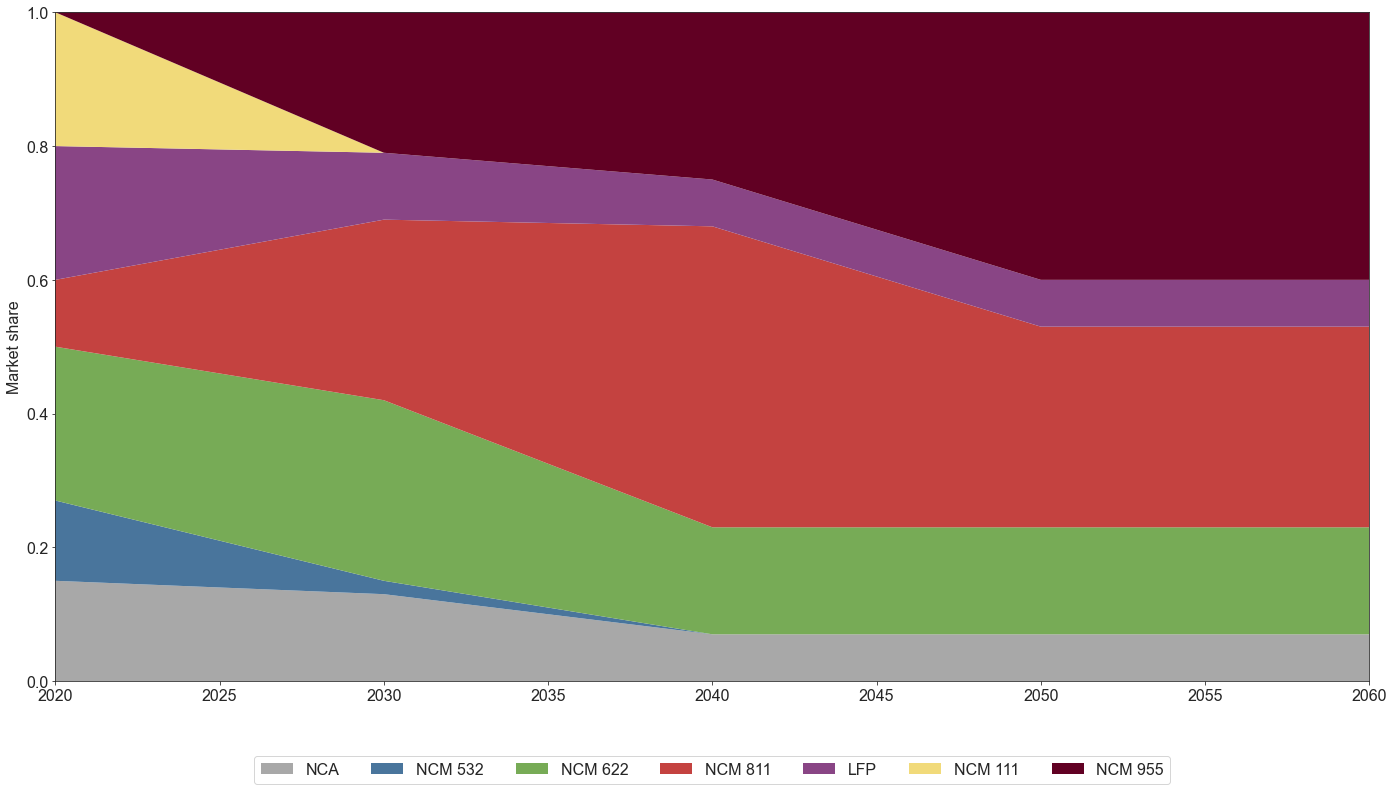

In [40]:
inter = chemistries.copy().transpose()
inter.drop('Li-S', axis = 1, inplace = True)
inter.plot.area(cmap = my_map,figsize =(19.2,11), fontsize = 16, linewidth = 0)
#plt.legend(bbox_to_anchor = (1,1))
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center',ncol=8, fontsize = 16)

plt.ylim(0,1)
plt.xlim(2020,2060)
plt.tight_layout()
plt.ylabel('Market share', fontsize = 16 )
#plt.savefig('chemistries.jpeg', pad = 5, dpi = 1200)
#plt.savefig('chemistries_lowres.jpeg', dpi = 400, pad_inches = 10)
plt.show()

## Plot survival rate distribution for vehicles entering the stock at year x

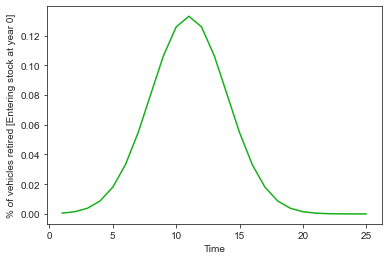

In [41]:
mu = 11
sigma = 3
x = np.linspace(1, 25, 25)
#y = np.linspace(mu-5*sigma, mu+4*sigma, 15)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.ylabel('% of vehicles retired [Entering stock at year 0]')
plt.xlabel('Time')
#plt.savefig('Retirement curves.jpg', dpi = 600)
plt.show()


## Read data on current and future production capacity for Li-ion batteries

In [42]:
production_capacity = pd.read_excel('Test_chemistries.xlsx', sheet_name = 'Production capacity', skiprows = 39, nrows = 4, usecols = 'C:R')

## Create Dataframe with mining rates of different materials. Data based on USGS 

In [43]:
mining_rate_2019 = pd.DataFrame(data = [144000000,1100000000,82000000])
mining_rate_2019 = mining_rate_2019.transpose()
mining_rate_2019.columns = ['Co','Graphite','Li']

mining_rate_2025 = pd.DataFrame(data = [250000000,155000000])
mining_rate_2025 = mining_rate_2025.transpose()
mining_rate_2025.columns = ['Co','Li']


## Convert capacity flows from kWh to TWh. 
## Convert material flows from kg to Mt (mega-tonnes)

In [44]:
mining_rate_2019 = mining_rate_2019.div(1e9)
mining_rate_2025 = mining_rate_2025.div(1e9)

for i in range(len(material_additions)):
    material_additions[i] = material_additions[i].div(1e9)
    material_outflows[i] = material_outflows[i].div(1e9)
    capacity_additions[i] = capacity_additions[i].div(1e9)
    capacity_outflows[i] = capacity_outflows[i].div(1e9)


# Plot Cobalt, Lithium and Graphite flows 

col_background = ['#d8dcd6']

#Colors in the following order:  RCP2.6 SSP2 - RCP2.6 SSP1 - RCP2-6 LED - base SSP2 - base SSP1 - base LED # 
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402']

customp = sns.set_palette(sns.color_palette(linecols))



fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,15), gridspec_kw={'wspace': .3})

ax[0].axis (True)

ax[0].set_title('Cobalt', size = 'x-large')
ax[1].set_title('Lithium', size = 'x-large')
ax[2].set_title('Graphite', size = 'x-large')
ax[0].set_xlim(2020,2050)
ax[1].set_xlim(2020,2050)
ax[2].set_xlim(2020,2050)


ax[0].yaxis.grid(color = 'black', alpha = 0.1)
ax[1].yaxis.grid(color = 'black', alpha = 0.1)
ax[2].yaxis.grid(color = 'black', alpha = 0.1)

ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)

ax[0].set_ylabel('Material flows [Mt/yr]', size = 'x-large')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[0].set_xlabel('Year', size = 'x-large')
ax[1].set_xlabel('Year', size = 'x-large')
ax[2].set_xlabel('Year', size = 'x-large')


x = material_add_tot_base_SSP2.columns.values
x = np.array(x, dtype = float)

y1 = material_out_tot_base_SSP2.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP2.loc['Co'].divide(1e9))
y2 = material_out_tot_base_SSP1.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP1.loc['Co'].divide(1e9))

ax[0].plot(x,y1, color = linecols[0])
ax[0].plot(x,y2, color = linecols[1])

y3 = material_out_tot_RCP26_SSP1.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP1.loc['Co'].divide(1e9))
y4 = material_out_tot_RCP26_SSP2.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP2.loc['Co'].divide(1e9))

ax[0].plot(x,y3, color = linecols[2])
ax[0].plot(x,y4, color = linecols[3])


y6 = material_out_tot_base_LED.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_LED.loc['Co'].divide(1e9))
y5 = material_out_tot_RCP26_LED.loc['Co'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_LED.loc['Co'].divide(1e9))

ax[0].plot(x,y5, color = linecols[5])
ax[0].plot(x,y6, color = linecols[4])

## 3

y1 = material_out_tot_base_SSP2.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP2.loc['Li'].divide(1e9))
y2 = material_out_tot_base_SSP1.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP1.loc['Li'].divide(1e9))

ax[1].plot(x,y1, color = linecols[0])
ax[1].plot(x,y2, color = linecols[1])

y3 = material_out_tot_RCP26_SSP1.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP1.loc['Li'].divide(1e9))
y4 = material_out_tot_RCP26_SSP2.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP2.loc['Li'].divide(1e9))

ax[1].plot(x,y3, color = linecols[2])
ax[1].plot(x,y4, color = linecols[3])


y6 = material_out_tot_base_LED.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_LED.loc['Li'].divide(1e9))
y5 = material_out_tot_RCP26_LED.loc['Li'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_LED.loc['Li'].divide(1e9))

ax[1].plot(x,y5, color = linecols[5])
ax[1].plot(x,y6, color = linecols[4])



## 9
y1 = material_out_tot_base_SSP2.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP2.loc['Graphite'].divide(1e9))
y2 = material_out_tot_base_SSP1.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_SSP1.loc['Graphite'].divide(1e9))

ax[2].plot(x,y1, color = linecols[0])
ax[2].plot(x,y2, color = linecols[1])

y3 = material_out_tot_RCP26_SSP1.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP1.loc['Graphite'].divide(1e9))
y4 = material_out_tot_RCP26_SSP2.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_SSP2.loc['Graphite'].divide(1e9))

ax[2].plot(x,y3, color = linecols[2])
ax[2].plot(x,y4, color = linecols[3])


y6 = material_out_tot_base_LED.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_base_LED.loc['Graphite'].divide(1e9))
y5 = material_out_tot_RCP26_LED.loc['Graphite'].divide(1e9)[:46].mul(-1).divide(material_add_tot_RCP26_LED.loc['Graphite'].divide(1e9))

ax[2].plot(x,y5, color = linecols[5])
ax[2].plot(x,y6, color = linecols[4])

### LEGEND #####

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')

scat2 =  mlines.Line2D([], [], color = 'black', marker = '.', linestyle = '', label='Production in 2019')
scat3 =  mlines.Line2D([], [], color = 'blue', marker = '.', linestyle = '', label='Projected production in 2025')

range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [range_int, line3,line4,line5, line1, line2, line6, scat2, scat3]
plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.45, 0.065),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 3, markerscale = 2)
gridlines = ax[0].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)

gridlines = ax[1].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)
gridlines = ax[2].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)

#plt.savefig('potential_recovery.jpg', dpi = 400, bbox_inches = 'tight')

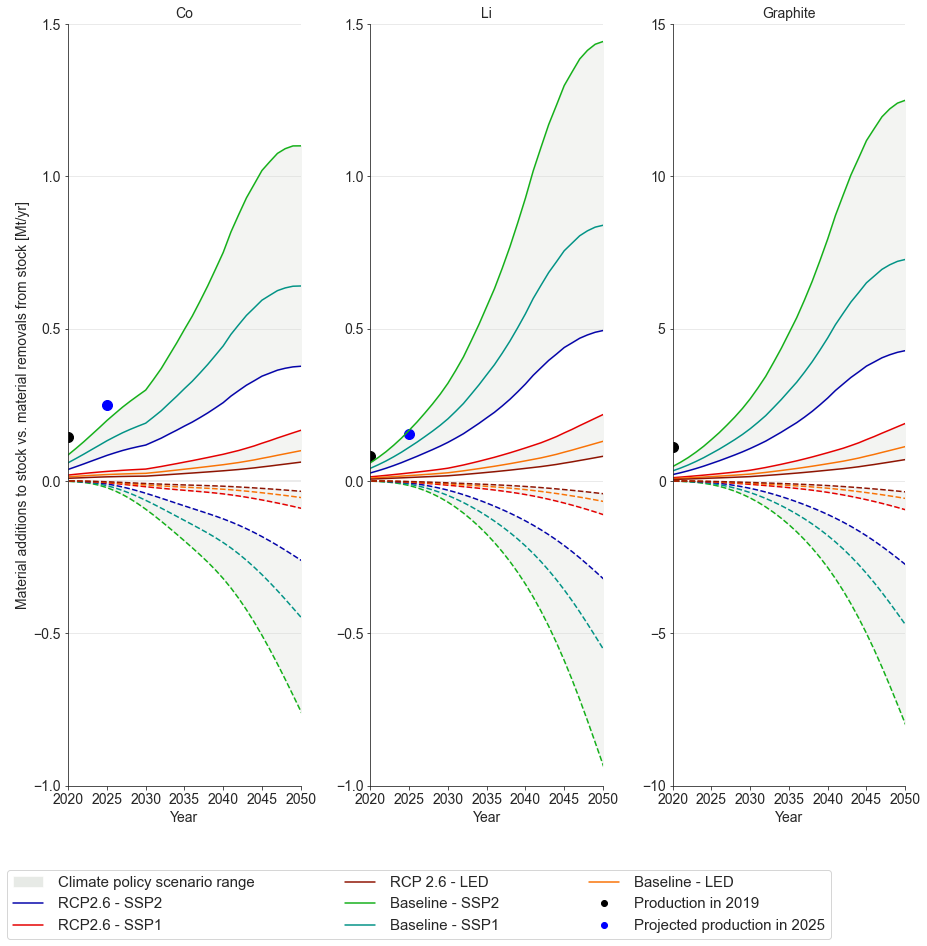

In [45]:
col_background = ['#d8dcd6']

linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402']

customp = sns.set_palette(sns.color_palette(linecols))


fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,15), gridspec_kw={'wspace': .3})

ax[0].axis (True)

ax[0].set_ylim(-1,1.5)
ax[1].set_ylim(-1,1.5)
ax[2].set_ylim(-10,15)

ax[0].set_ylabel('Material additions to stock vs. material removals from stock [Mt/yr]', size = 'x-large')

x = material_additions[0].columns.values
x = np.array(x, dtype = int)

materials_to_plot = ['Co','Li','Graphite']
ncols = 3

for i, k in zip(range(len(materials_to_plot)), materials_to_plot): 
  for j in range(len(material_additions)):
    y = material_additions[j].loc[k]
    ax[i].plot(x,y, linecols[j])
    
    y = material_outflows[j].loc[:,2015:2060].loc[k].mul(-1)
    ax[i].plot(x,y, linecols[j], linestyle = 'dashed')

  ax[i].set_title(f'{materials_to_plot[i]}')
  ax[i].set_xlim(2020,2050)
  ax[i].yaxis.grid(color = 'black', alpha = 0.1)
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].set_xlabel('Year')

  for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] +
              ax[i].get_xticklabels() + ax[i].get_yticklabels()):
      item.set_fontsize(14)

  ax[i].fill_between(
    x,
    material_additions[0].loc[k],
    material_additions[2].loc[k], 
    color = col_background,
    alpha = 0.3,
    interpolate = True
    )

  ax[i].fill_between(x,
    material_additions[3].loc[k],
    material_additions[5].loc[k],
    color = col_background,
    alpha = 0.3,
    interpolate = True
    )

  ax[i].fill_between(
    x,
    material_outflows[0].loc[:,2015:2060].loc[k].mul(-1), 
    material_outflows[2].loc[:,2015:2060].loc[k].mul(-1), 
    color = col_background, 
    alpha = 0.3, 
    interpolate = True
    )

  ax[i].fill_between(
    x, 
    material_outflows[3].loc[:,2015:2060].loc[k].mul(-1),
    material_outflows[5].loc[:,2015:2060].loc[k].mul(-1),
    color = col_background,
    alpha = 0.3,
    interpolate = True
    )

  ax[i].scatter(2020, mining_rate_2019[k], color = 'black', s = 100)
  if k != 'Graphite':
    ax[i].scatter(2025, mining_rate_2025[k], color = 'blue', s = 100)
  else: 
    break

#ToDO Plot negative flows

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')
scat2 =  mlines.Line2D([], [], color = 'black', marker = '.', linestyle = '', label='Production in 2019')
scat3 =  mlines.Line2D([], [], color = 'blue', marker = '.', linestyle = '', label='Projected production in 2025')

range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')

lines = [range_int, line3,line4,line5, line1, line2, line6, scat2, scat3]
plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.45, 0.065),
              borderaxespad=0.1, handletextpad=1., columnspacing=6,
              fontsize=15, frameon=True, ncol= 3, markerscale = 2)

gridlines = ax[0].yaxis.get_gridlines()
gridlines[2].set_color('black')
gridlines[2].set_linewidth(1.5)


#plt.savefig('New figures/flows_new_withmining.jpg', dpi = 600,bbox_inches='tight')

0


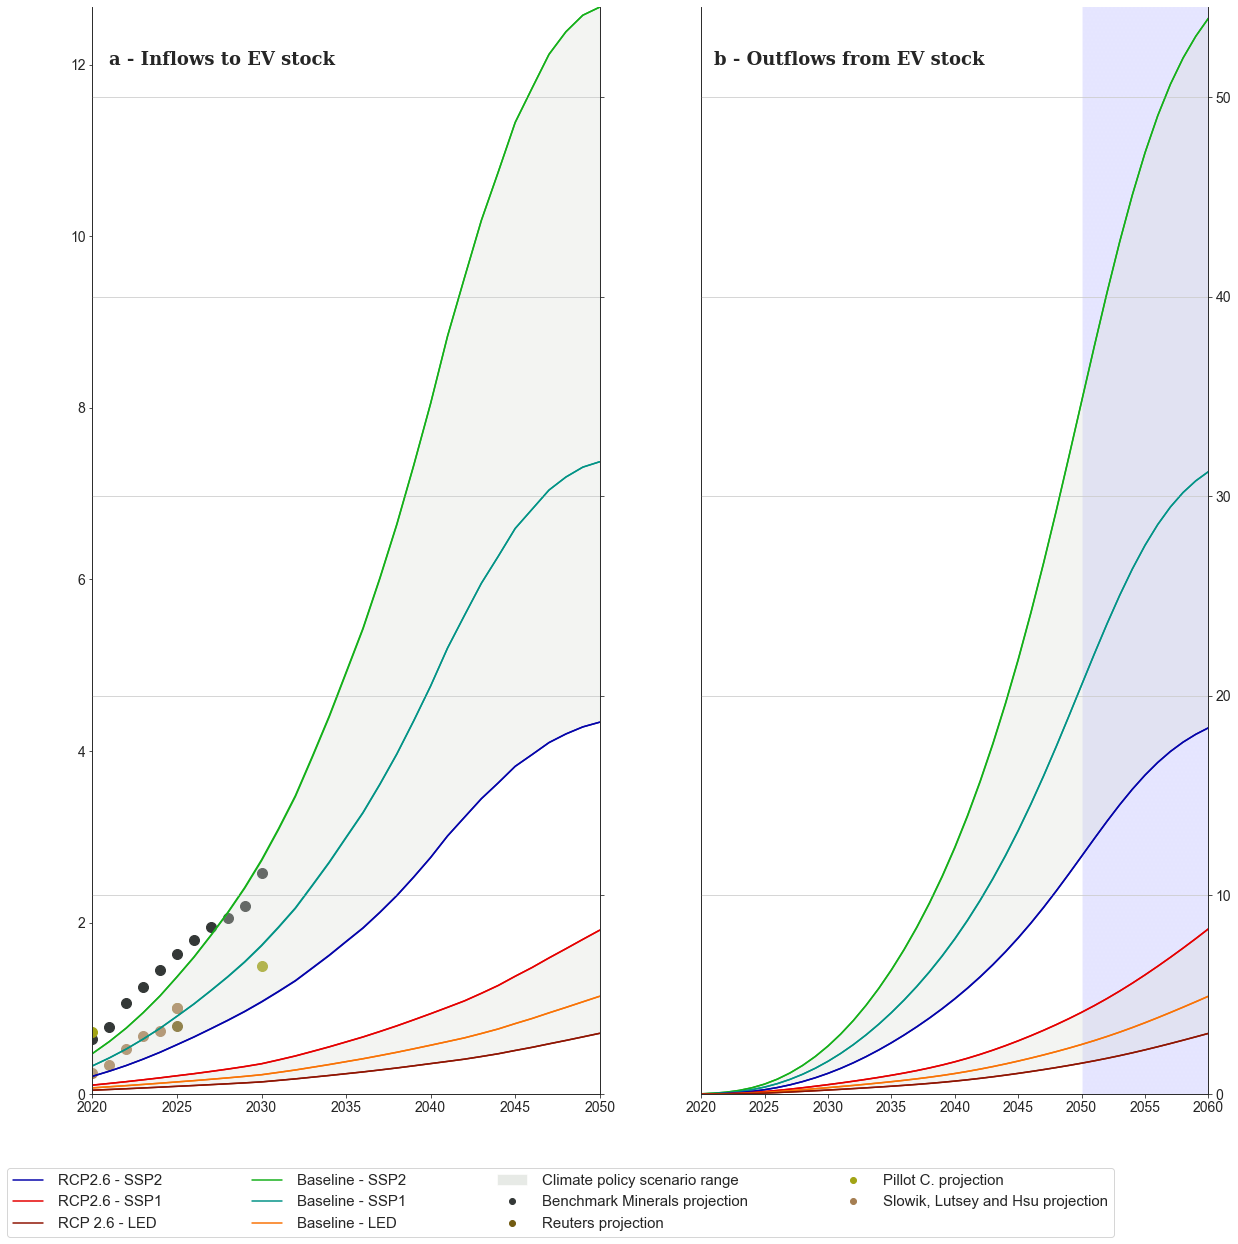

In [46]:
fig, ax = plt.subplots(figsize=(20,20), nrows = 1, ncols=2)

col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402']
cols_scat = ['#343837','#735c12','#a2a415','#a57e52']


nplots = 2

for i in range(nplots):
  if i == 0:
    print(i)
    ax2 = ax[i].twinx()
    ax[i].spines['top'].set_visible(False)
    ax2.grid(None)
    ax2.spines['top'].set_visible(False)
    ax2.axes.yaxis.set_ticklabels([])

    ax[i].set_ylim(0,capacity_additions[0][2050].sum(axis =0))
    ax2.set_ylim(0,material_additions[0][2050].sum(axis = 0))

    for k in range(len(material_additions)):
      x = capacity_additions[0].columns.values[5:36]
      x = np.array(x, dtype = 'int')
      y = capacity_additions[k].sum(axis = 0)[5:36]
      ax[i].plot(x, y, color = linecols[k])
      y = material_additions[k].sum(axis = 0)[5:36]
      ax2.plot(x, y, color = linecols[k])
    for l in range(4):
      yscat = production_capacity.loc[:,2020:].divide(1e3).loc[l]
      xscat = production_capacity.loc[:,2020:].columns.values
      ax[i].scatter(xscat, yscat, color = cols_scat[l], s = 100)

    ax[i].text(2021, 12, 'a - Inflows to EV stock', fontsize = 18, fontfamily = 'serif', fontweight = 'bold')
    ax[i].set()
    ax[i].set_xlim(2020,2050)

    ax[i].fill_between(
    x,
    capacity_additions[0].loc[:,2020:2050].sum(axis = 0), 
    capacity_additions[2].loc[:,2020:2050].sum(axis = 0), 
    color = col_background, 
    alpha = 0.3, 
    )

    ax[i].fill_between(
    x,
    capacity_additions[3].loc[:,2020:2050].sum(axis = 0), 
    capacity_additions[5].loc[:,2020:2050].sum(axis = 0), 
    color = col_background, 
    alpha = 0.3, 
    )

  else:
    x = capacity_outflows[0].columns.values[5:46]
    x = np.array(x, dtype = 'int')
    ax2 = ax[i].twinx()


    for k in range(len(material_outflows)):
      y = capacity_outflows[k].sum(axis = 0)[5:46]
      ax[i].plot(x, y, color = linecols[k])      
      y = material_outflows[k].sum(axis = 0)[5:46]
      ax2.plot(x,y, color = linecols[k])
      #ax2.grid(None)

    ax[i].spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    #ax2.axes.yaxis.set_ticklabels([])
    ax[i].set_ylim(0,capacity_additions[0][2050].sum(axis =0))
    ax2.set_ylim(0,material_additions[0][2050].sum(axis = 0))
    ax2.tick_params(labelsize = 14)
    ax[i].set_xlim(2020,2060)
    ax[i].legend_ = None
    ax[i].set_yticks([])

    ax[i].fill_between([2050,2060],[0,0],[13,13],facecolor='blue',
                  alpha=0.1, hatch='...',edgecolor='w',zorder=1)
    ax[i].text(2021, 12, 'b - Outflows from EV stock', fontsize = 18, fontfamily = 'serif', fontweight = 'bold')
    ax[i].fill_between(
    x,
    capacity_outflows[0].loc[:,2020:2060].sum(axis = 0), 
    capacity_outflows[2].loc[:,2020:2060].sum(axis = 0), 
    color = col_background, 
    alpha = 0.3, 
    )

    ax[i].fill_between(
    x,
    capacity_outflows[3].loc[:,2020:2060].sum(axis = 0), 
    capacity_outflows[5].loc[:,2020:2060].sum(axis = 0), 
    color = col_background, 
    alpha = 0.3, 
    )


  for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] +
              ax[i].get_xticklabels() + ax[i].get_yticklabels()):
      item.set_fontsize(14)


#ax[0].tick_params(labelsize = 14)
#ax[1].tick_params(labelsize = 14)
#ax2.tick_params(labelsize = 14)
#ax2.set_ylabel('Total flows of materials (Mt/year)', size = 'x-large')

ax2.grid(None)

ax[1].set_xlim(2020,2060)
ax[1].legend_ = None




######### LEGEND ################

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')

scat1 =  mlines.Line2D([], [], color = cols_scat[0], marker = '.', linestyle = '', label='Benchmark Minerals projection')
scat2 =  mlines.Line2D([], [], color = cols_scat[1], marker = '.', linestyle = '', label='Reuters projection')
scat3 =  mlines.Line2D([], [], color = cols_scat[2], marker = '.', linestyle = '', label='Pillot C. projection')
scat4 =  mlines.Line2D([], [], color = cols_scat[3], marker = '.', linestyle = '', label='Slowik, Lutsey and Hsu projection')

range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')

lines = [line3,line4,line5, line1, line2, line6,range_int, scat1,scat2,scat3,scat4]

fig.legend(
  handles=lines,
  loc='center',
  bbox_to_anchor=(0.45, .05), 
  borderaxespad=0.1, 
  handletextpad=1., 
  columnspacing=6,
  fontsize=15, 
  frameon=True, 
  ncol= 4, 
  markerscale = 2
  )


#plt.tight_layout()
#ax2.set_ylim(0,34.5)
#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())))
#plt.savefig('New figures\ew_new_Figure1.jpg', dpi = 600, bbox_inches = 'tight')


(0.0, 350.0)

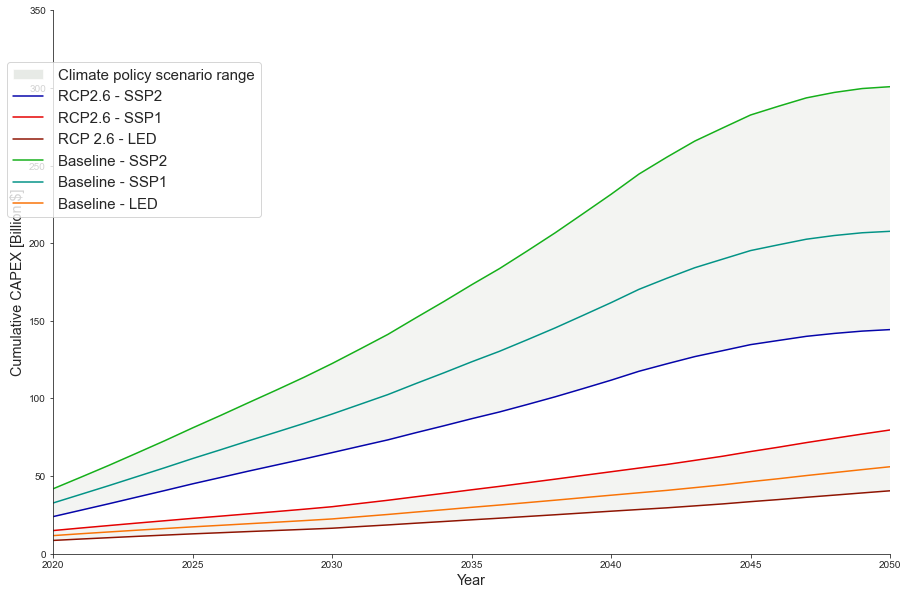

In [47]:
col_background = ['#d8dcd6']

#Specificy in following order: base SSP2 - base SSP1 - RCP2.6 SSP2 - RCP2.6 SSP1 - base LED - RCP2-6 LED# 
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402']

customp = sns.set_palette(sns.color_palette(linecols))

fig, ax = plt.subplots(figsize = (15,10))
#ax.set_title('Cumulative CAPEX', size = 'x-large')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(2020,2050)
ax.set_ylabel('Cumulative CAPEX [Billion $]', size = 'x-large')
ax.set_xlabel('Year', size = 'x-large')


x = CAPEX[0].index.values
x = np.array(x, dtype = 'float')

for i in range(len(CAPEX)):
  y = CAPEX[i].cumsum(axis = 0).div(1e3)
  ax.plot(x,y, color = linecols[i])

ax.fill_between(x, CAPEX[0].cumsum(axis =0).div(1e3), CAPEX[2].cumsum(axis =0).div(1e3), color = col_background, alpha = .3)
ax.fill_between(x, CAPEX[3].cumsum(axis =0).div(1e3), CAPEX[5].div(1e3).cumsum(axis =0), color = col_background, alpha = .3)

ax.legend_= None

#ax[0].set_ylim(0,50)
#ax[1].set_ylim(0,800)

line1 =  mlines.Line2D([], [], color = linecols[0], label='Baseline - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='Baseline - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP2.6 - SSP2')
line4 =  mlines.Line2D([], [], color = linecols[3], label='RCP2.6 - SSP1')
line5 =  mlines.Line2D([], [], color = linecols[5], label='RCP 2.6 - LED')
line6 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - LED')
range_int = mpatches.Patch(color = col_background[0], ec=None, alpha=0.6,
                            label='Climate policy scenario range')
#handles_BEV2 = [baseline_marker]
lines = [range_int, line3,line4,line5, line1, line2, line6]
#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend
# draw each "column" of the legend separately
#fig.text(0.128, 0.07, 'SSP2 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.text(0.128, -0.05, 'SSP1 -', fontsize=8.5, zorder=10)  # labels for range extremities
#fig.legend(handles=handles_BEV2, loc='center left', bbox_to_anchor=(0.35, 0.065),
 #              borderaxespad=0.05, handletextpad=1., columnspacing=6,
  #             fontsize=15, markerscale=2.5, frameon=False)
fig.legend(handles=lines, loc='center', bbox_to_anchor=(0.2, .7),
               borderaxespad=0.1, handletextpad=1., columnspacing=6,
               fontsize=15, frameon=True, ncol= 1)

#ax.fill_between(x, y4,y6, color = col_background, alpha = .3)
#ax.fill_between(x, y1,y3, color = col_background, alpha = .3)
ax.set_ylim(0,350)

#plt.savefig('New figures/CAPEX_exprates.jpg', dpi = 400, bbox_inches = 'tight')

In [48]:
material_additions_historical = material_additions_historical.div(1e9)

2000    2.694
2001    2.562
2002    2.648
2003    3.378
2004    3.780
2005    4.370
2006    4.788
2007    5.424
2008    5.816
2009    6.166
2010    7.018
2011    7.308
2012    7.022
2013    6.330
2014    6.274
2015    5.754
dtype: float64

In [54]:
material_additions[0].loc[:,2015:2020]

,2015,2016,2017,2018,2019,2020
material,,,,,,
Al,0.0,0.101399,0.141551,0.190351,0.259384,0.341837
Co,0.0,0.027806,0.038001,0.049999,0.066623,0.085806
Cu,0.0,0.123115,0.171662,0.230565,0.313803,0.413054
Graphite,0.0,0.139548,0.195062,0.262654,0.358378,0.472923
Li,0.0,0.018055,0.025090,0.033583,0.045549,0.059745
Mn,0.0,0.028898,0.038655,0.049703,0.064612,0.081029
Ni,0.0,0.058171,0.083460,0.115276,0.161245,0.218009
Plastics,0.0,0.052529,0.073473,0.098998,0.135166,0.178484
Steel,0.0,0.056716,0.079330,0.106889,0.145940,0.192711


In [55]:
scenarios_2015_2020 = [None]*len(material_additions)
for i in range(len(material_additions)):
    scenarios_2015_2020[i] = material_additions[i].loc[:,2015:2020]


,2015,2016,2017,2018,2019,2020
material,,,,,,
Al,0.0,0.101399,0.141551,0.190351,0.259384,0.341837
Co,0.0,0.027806,0.038001,0.049999,0.066623,0.085806
Cu,0.0,0.123115,0.171662,0.230565,0.313803,0.413054
Graphite,0.0,0.139548,0.195062,0.262654,0.358378,0.472923
Li,0.0,0.018055,0.025090,0.033583,0.045549,0.059745
Mn,0.0,0.028898,0.038655,0.049703,0.064612,0.081029
Ni,0.0,0.058171,0.083460,0.115276,0.161245,0.218009
Plastics,0.0,0.052529,0.073473,0.098998,0.135166,0.178484
Steel,0.0,0.056716,0.079330,0.106889,0.145940,0.192711


In [ ]:
linecols = ['#15b01a','#029386','#0504aa','#e50000','#f97306','#8f1402','#000000','#d648d7','#6258c4','#580f41','#8eab12','#000000']
col_background = ['#d8dcd6']
#markers = ['d','X','d','X','s','s','s']


fig, ax = plt.subplots(figsize = (15,15))
for i in range(len(materials_addition_all)):
    if i <= 5:
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i])
        y = scenarios_2015_2020[i]
        x = scenarios_2015_2020[i].index
        ax.plot(x,y, color = linecols[i], linestyle = ('--'))
    elif i> 5 and i <= 10: 
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i], linestyle=('-.'))
    else: 
        y = materials_addition_all[i]
        x = materials_addition_all[i].index
        ax.plot(x, y, color = linecols[i], linewidth = 3)

#plt.annotate("I HAVE NO IDEA WHAT I AM DOING?!", xy=(2040,0.001))
ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[0], y2 = materials_addition_all[2],color = col_background, alpha = .3)
ax.fill_between(x = materials_addition_all[0].index.astype('int'), y1 = materials_addition_all[3], y2 = materials_addition_all[5],color = col_background, alpha = .3)

ax.fill_between(x = scenarios_2015_2020[0].index.astype('int'), y1 = scenarios_2015_2020[0], y2 = scenarios_2015_2020[2],color = col_background, alpha = .3)
ax.fill_between(x = scenarios_2015_2020[0].index.astype('int'), y1 = scenarios_2015_2020[3], y2 = scenarios_2015_2020[5],color = col_background, alpha = .3)


ax.set_yscale('log')
ax.set_ylabel('Materials use [Mt/yr]', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)

ax.set_xlim(2000,2050)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize = 14)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
#ax.set_xlim(1e-1,1e2)
##### LEGEND #####

line1 =  mlines.Line2D([], [], color = linecols[0], label='RCP2.6 - SSP2')
line2 =  mlines.Line2D([], [], color = linecols[1], label='RCP2.6 - SSP1')
line3 =  mlines.Line2D([], [], color = linecols[2], label='RCP 2.6 - LED')
line4 =  mlines.Line2D([], [], color = linecols[3], label='Baseline - SSP2')
line5 =  mlines.Line2D([], [], color = linecols[4], label='Baseline - SSP1')
line6 =  mlines.Line2D([], [], color = linecols[5], label='Baseline - LED')
line12 =  mlines.Line2D([], [], color = linecols[6], label='LIBs_Historical', linewidth = 3)
line7 =  mlines.Line2D([], [], color = linecols[6], label='Personal Computers', linestyle = ('-.'))
line8 =  mlines.Line2D([], [], color = linecols[7], label='Smartphones', linestyle = ('-.'))
line9 =  mlines.Line2D([], [], color = linecols[8], label='Solar Panels', linestyle = ('-.'))
line10 =  mlines.Line2D([], [], color = linecols[9], label='LIBs China', linestyle = ('-.'))
line11 =  mlines.Line2D([], [], color = linecols[10], label='PbA EU', linestyle = ('-.'))

#handles_BEV2 = [baseline_marker]
lines = [line1,line2,line3,line4, line5,line6,line12,line7,line8,line9,line10,line11]
#lines = [rcp_first15, pcs,rcp_last15,  PV, base_first15,  smartphones, base_last15,  ]#, scat1, scat2]

#plt.subplots_adjust(bottom=0.175)  # make extra room under figure for legend

ax.legend(handles=lines, loc='center', bbox_to_anchor=(0.5, - 0.1 ), borderaxespad=0.1, handletextpad=1., columnspacing=1, fontsize=14, frameon=True, ncol = 4, markerscale = 2)
#plt.savefig('New figures/Reference techs_mat demand over time_LIBs EVs historical.jpg', bbox_inches = 'tight', dpi = 600)